Confusion Matrix:
[[2035   31]
 [  70  608]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2066
           1       0.95      0.90      0.92       678

    accuracy                           0.96      2744
   macro avg       0.96      0.94      0.95      2744
weighted avg       0.96      0.96      0.96      2744



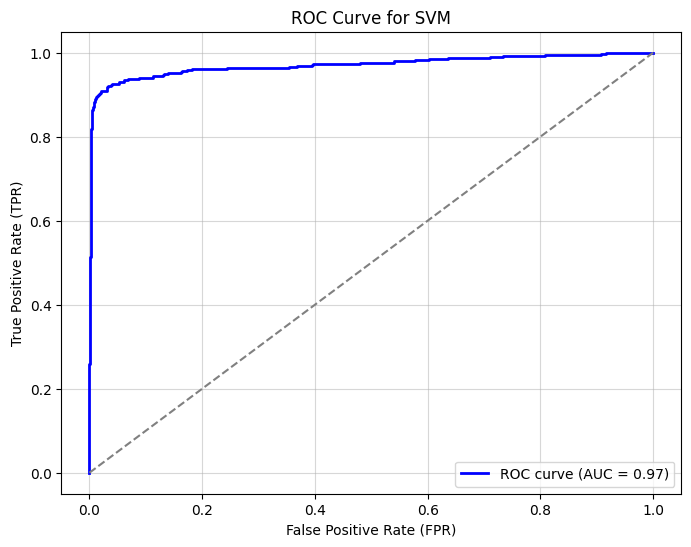

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load Data
file_path = '/Users/hamidrezatofighian/Documents/datapy/HR_DataSet.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
data['Department'] = data['Department'].astype('category').cat.codes
data['salary'] = data['salary'].astype('category').cat.codes

# Remove Outliers
columns_to_check_outliers = ['average_montly_hours', 'time_spend_company']
for column in columns_to_check_outliers:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Split Data
X = data.drop(columns=['left'])
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9732983099486485
Confusion Matrix:
[[2037   29]
 [  48  630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2066
           1       0.96      0.93      0.94       678

    accuracy                           0.97      2744
   macro avg       0.97      0.96      0.96      2744
weighted avg       0.97      0.97      0.97      2744



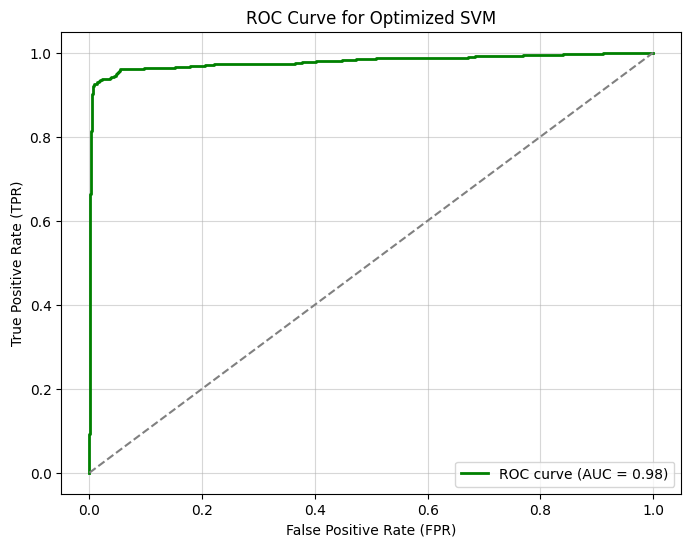

In [2]:
# Import Required Libraries
from sklearn.model_selection import GridSearchCV

# Define Parameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best Parameters and Best Model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the Model with Best Parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_optimized = best_svm_model.predict(X_test_scaled)
y_prob_optimized = best_svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

# Plot ROC Curve for Optimized Model
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_optimized)
roc_auc_opt = auc(fpr_opt, tpr_opt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_opt, tpr_opt, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Optimized SVM')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9732983099486485
Confusion Matrix:
[[2037   29]
 [  48  630]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2066
           1       0.96      0.93      0.94       678

    accuracy                           0.97      2744
   macro avg       0.97      0.96      0.96      2744
weighted avg       0.97      0.97      0.97      2744



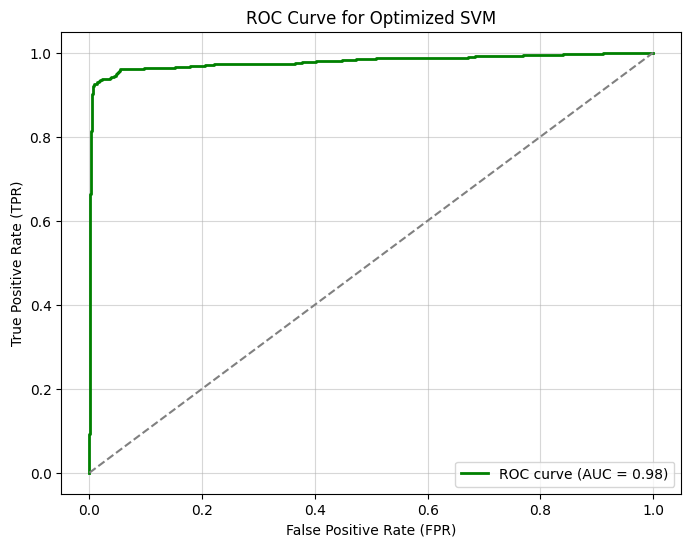

In [ ]:
# Import Required Libraries
from sklearn.model_selection import GridSearchCV

# Define Parameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold Cross Validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best Parameters and Best Model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the Model with Best Parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_optimized = best_svm_model.predict(X_test_scaled)
y_prob_optimized = best_svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

# Plot ROC Curve for Optimized Model
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_optimized)
roc_auc_opt = auc(fpr_opt, tpr_opt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_opt, tpr_opt, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Optimized SVM')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()